In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Data
df = pd.read_csv('Salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

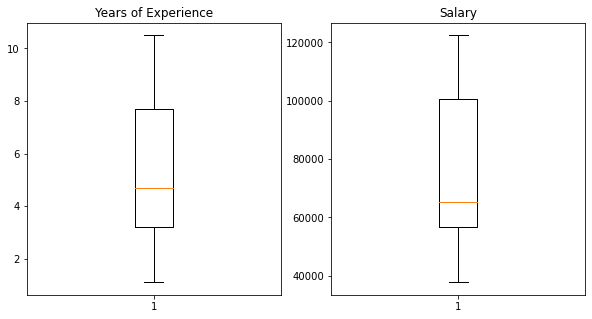

In [8]:
#Boxplot
plt.subplots(figsize = (10, 5))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')

plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

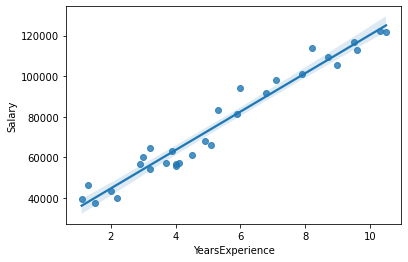

In [10]:
#Visualization of correlation between x and y using regression
sns.regplot(x = df['YearsExperience'], y = df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

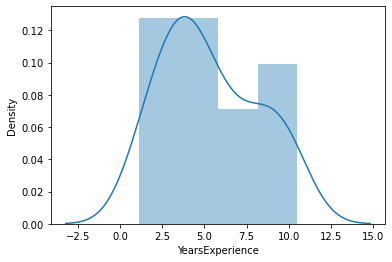

In [11]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

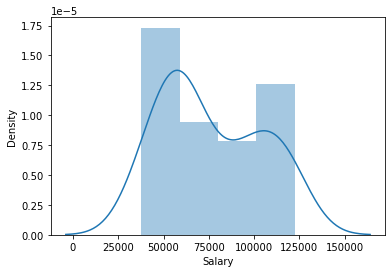

In [12]:
sns.distplot(df['Salary'])

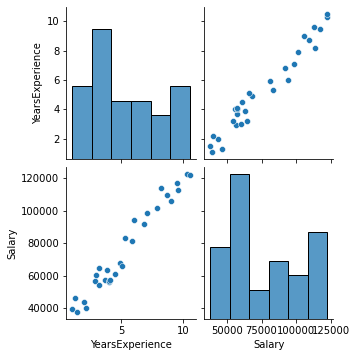

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
df = df.rename({'YearsExperience': 'Experience'}, axis=1)
df.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Model Building

In [16]:
model = smf.ols('Salary~Experience', data = df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        23:50:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square Root Transformation on Data

In [18]:
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(Experience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.58e-19
Time:                        23:50:07   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cube Root Transformation on Data

In [19]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(Experience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           6.37e-18
Time:                        23:50:07   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation on Data

In [20]:
model3 = smf.ols('np.log(Salary)~np.log(Experience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.40e-16
Time:                        23:50:07   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model3.params

Intercept             10.328043
np.log(Experience)     0.562089
dtype: float64

In [22]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept             184.867959
np.log(Experience)     16.352542
dtype: float64 
 Intercept             9.073132e-45
np.log(Experience)    7.395278e-16
dtype: float64


# Residual Analysis
## Test for Normality of Residuals (Q-Q plot)

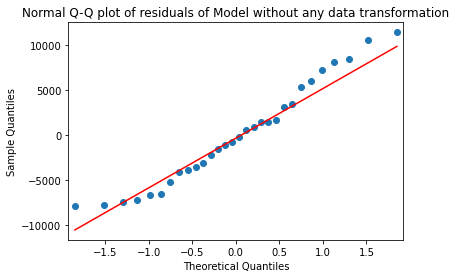

In [23]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

# Residual Plot to check Homoscedasticity or Heteroscedasticity

In [24]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

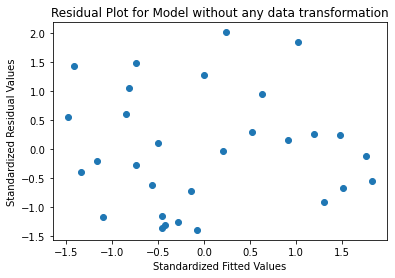

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Model Validation
## Comparing different models with respect to their Root Mean Squared Errors

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
model1_pred_y = np.square(model1.predict(df['Experience']))
model2_pred_y = pow(model2.predict(df['Experience']), 3)
model3_pred_y = np.exp(model3.predict(df['Experience']))

In [28]:
model1_rmse = np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model = ', np.sqrt(model.mse_resid), '\n' 'model_1 = ', model1_rmse, '\n' 'model_2 = ', model2_rmse, '\n' 'model_3 = ', model3_rmse)

model =  5788.315051119395 
model_1 =  5960.647096174311 
model_2 =  6232.8154558358565 
model_3 =  7219.716974372802


In [29]:
rmse = {'model': np.sqrt(model.mse_resid), 'model_1': model1_rmse, 'model_2': model2_rmse, 'model_3': model3_rmse}
min(rmse, key = rmse.get)

'model'

In [30]:
predicted = pd.DataFrame()
predicted['Experience'] = df.Experience
predicted['Salary'] = df.Salary
predicted['Predicted_Salary'] = pd.DataFrame(model.predict(predicted.Experience))
predicted

,Experience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [31]:
predicted.to_excel("Predicted_SalaryValues.xlsx")